## Part 3: Load the dataset
We start off by building a dict mapping to each classification of the features:

In [1]:
import pandas
from pandas import DataFrame as df
import matplotlib.pyplot as plt

def build_feature_dict(filename):
    feature_map = {
        # index: {
        #   name: feature_name,
        #   class_map: [
        #           {c: class}
        #       ]
        #   }

    }
    with open(filename, "r") as file:
        file_data = file.readlines()

        for line in file_data:
            if "\n" in line:
                line = line.replace("\n", "")
            values = line.split(". ")
            index = int(values[0])

            values = values[1]
            values = values.split(": ")

            feature_name = values[0]
            values = values[1].split(",")
            class_map = {}

            for value in values:
                class_relation = value.split("=")
                class_map[class_relation[1]] = class_relation[0]

            feature_map[index] = {
                "name": feature_name,
                "class_map": class_map
            }

        return feature_map

In [2]:
def build_pandas(feature_dict, data_file):
    with open(data_file, "r") as file:
        line = file.readline()
        data_dict = {}
        dict_index = 0
        while line:
            if "\n" in line:
                line = line.replace("\n", "")

            feature_values = line.split(",")
            frame_dict = {}
            for index, classification in zip(feature_dict, feature_values):
                feature = feature_dict[index]
                feature_name = feature["name"]
                frame_dict[feature_name] = feature["class_map"][classification]
            data_dict[dict_index] = frame_dict
            line = file.readline()
            dict_index += 1
        main_table = df.from_dict(data_dict).T
    return main_table

Alternatively we can load the pre-classified data, using:

In [3]:
data_frames_from_csv = pandas.read_csv("public_data/agaricus-lepiota.data")

The resulting dataframe looks like this:
![ Pandas Dataframe ](illustrations/table.png)

## Part 4: Exploration of distributions
We can get a quick overview of the relationship between different classifications of two features,
by looking at the total number of mushroom-species fitting the two feature-classifications,
 here we see habitat vs. population:
![ Shroom distribution ](illustrations/distribution.png)
In order to get a visualization like this we need to apply some more code:

We then build a pandas dataframe (initially as a dict) using our classifications:

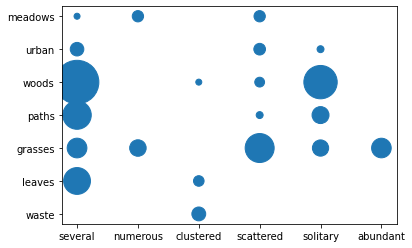

In [4]:
def get_overlap_amount(data_frame, label1, label2):
    unique_classes1 = set(data_frame[label1])
    unique_classes2 = set(data_frame[label2])
    combos = []
    amounts = []
    x = []
    y = []
    for classification1 in unique_classes1:
        for classification2 in unique_classes2:
            x.append(classification1)
            y.append(classification2)
            combos.append((classification1, classification2))
    for combo in combos:
        amount = len(data_frame.loc[(data_frame[label1] == combo[0]) & (data_frame[label2] == combo[1])])
        amounts.append(amount)
    return x, y, amounts

label1 = "population"
label2 = "habitat"
feature_dict = build_feature_dict("public_data/cleaned_features.txt")
data_frames = build_pandas(feature_dict, "public_data/agaricus-lepiota.data")
x, y, amounts = get_overlap_amount(data_frames, label1, label2)
plt.scatter(x=x, y=y, s=amounts)
# plt.show()

## Part 5: Dummy Variables
In order to generate dummy varables, we simply call the pandas method for doing so:

In [5]:
dummies = pandas.get_dummies(data_frames)

The resulting data-frame looks like this:
![ dummies ](illustrations/dummies.png)

## Part 6: Visualized Feature Space
We visualize the feature-space by plotting the dummies matrix as a sparse matrix plot. What you
see here is all the different combinations of features ⋅ classes for each individual mushroom.

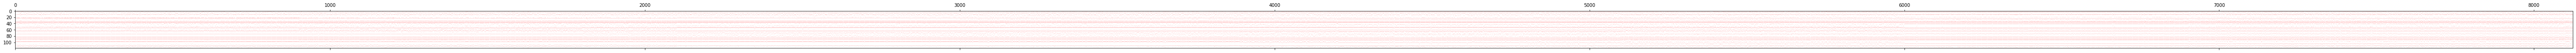

In [6]:
plt.spy(dummies.T, markersize=0.02, c="red")
fig = plt.gcf()
fig.set_size_inches(100, 3)
plt.plot()
plt.show()